In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.utils.visualize_util import plot
from keras.models import model_from_json


%matplotlib inline
import matplotlib.pyplot as plt
import sys
import time

nb_epoch = 5

Using Theano backend.
Using gpu device 0: GeForce GT 650M (CNMeM is disabled, cuDNN 5005)


In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_train = X_train.shape[0]
num_test = X_test.shape[0]
im_width  = X_train.shape[1]
im_height = X_train.shape[2]
print('shape before')
print(X_train.shape)
X_train = X_train.reshape(num_train,1, im_width,im_height)
X_test = X_test.reshape(num_test,1, im_width,im_height)

print('shape after')
print(X_train.shape)

shape before
(60000, 28, 28)
shape after
(60000, 1, 28, 28)


In [3]:
#Remove numbers 5 through 9
newX = []
newy = []
newXtest = []
newYtest = []
for i in range(len(y_train)):
    if y_train[i] < 5:
        newX.append(X_train[i])
        newy.append(y_train[i])
for i in range(len(y_test)):
    if y_test[i] < 5: 
        newXtest.append(X_test[i])
        newYtest.append(y_test[i])
X_train = np.array(newX)
y_train = np.array(newy)
X_test = np.array(newXtest)
y_test = np.array(newYtest)
        

In [4]:
# change type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the range
print('maximum of X_train:',np.max(X_train[:]))
X_train /= 255.0;
X_test /= 255.0;
print('maximum of X_train:',np.max(X_train[:]))

# convert class vectors to binary class matrices (one hot representation)
nb_classes = np.unique(y_train).size
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

maximum of X_train: 255.0
maximum of X_train: 1.0


In [5]:

# construct the network
model = Sequential()
model.add(Convolution2D(64, 10, 10, border_mode='same', input_shape=(1,im_width,im_height)))
model.add(Activation('relu'))
model.add(Dropout(0.23))
model.add(Convolution2D(16, 2, 2, border_mode='same', input_shape=(1,im_width,im_height)))
model.add(Activation('relu'))
model.add(Dropout(0.23))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, border_mode='valid'))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.23))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()



____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_1 (Convolution2D)    (None, 64, 28, 28)  6464        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 64, 28, 28)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)                (None, 64, 28, 28)  0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 16, 28, 28)  4112        dropout_1[0][0]                  
___________________________________________________________________________________________

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
batch_size = 128
start = time.time()
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
end = time.time()

Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 48s - loss: 0.1343 - acc: 0.9573 - val_loss: 0.0509 - val_acc: 0.9918
Epoch 2/5
30596/30596 [==============================] - 47s - loss: 0.0292 - acc: 0.9913 - val_loss: 0.0105 - val_acc: 0.9961
Epoch 3/5
30596/30596 [==============================] - 47s - loss: 0.0186 - acc: 0.9946 - val_loss: 0.0088 - val_acc: 0.9984
Epoch 4/5
30596/30596 [==============================] - 47s - loss: 0.0138 - acc: 0.9957 - val_loss: 0.0048 - val_acc: 0.9992
Epoch 5/5
30596/30596 [==============================] - 47s - loss: 0.0100 - acc: 0.9967 - val_loss: 0.0199 - val_acc: 0.9930


In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)

print ('Test score:   ', score[0])
print( 'Test accuracy:', score[1])
print( 'Time elapsed: ',(end - start), "seconds")

Test score:    0.0198585593819
Test accuracy: 0.99299474606
Time elapsed:  259.2973699569702 seconds


In [9]:
print (model)

In [10]:
plot(model, to_file='model.png')

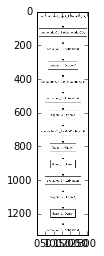

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('model.png')
plt.imshow(img)

In [12]:
#Save the weights of the model
model.save_weights('modelWeights.h5',overwrite=True)

#Save the architecture of the model
json_string_modelArchitecture = model.to_json()
open('my_model_architecture.json', 'w').write(json_string_modelArchitecture)


2433

In [13]:

if 'model' in dir():
    print ("deleted model")
    del model
else:
    print ("deleted already")

deleted model


In [14]:
#Load the old architecture
model = model_from_json(open('my_model_architecture.json').read())
model.load_weights('modelWeights.h5')

In [15]:
#Show the model to make sure the load in worked
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_1 (Convolution2D)    (None, 64, 28, 28)  6464        convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 64, 28, 28)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)                (None, 64, 28, 28)  0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 16, 28, 28)  4112        dropout_1[0][0]                  
___________________________________________________________________________________________

In [16]:
#pop the classification layers
model.layers.pop() #remove softmax activation
model.layers.pop() #remove classification output layer
model.layers.pop() #remove dropout
model.layers.pop() #remove Relu Activation
model.layers.pop() #remove fully connected layer
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_1 (Convolution2D)    (None, 64, 28, 28)  6464        convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 64, 28, 28)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)                (None, 64, 28, 28)  0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 16, 28, 28)  4112        dropout_1[0][0]                  
___________________________________________________________________________________________

In [17]:
for i in range(len(model.layers)):
    model.layers[i].train=False
    print ("Freezing ", model.layers[i].name)

Freezing  convolution2d_1
Freezing  activation_1
Freezing  dropout_1
Freezing  convolution2d_2
Freezing  activation_2
Freezing  dropout_2
Freezing  maxpooling2d_1
Freezing  flatten_1


In [18]:
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.23))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_1 (Convolution2D)    (None, 64, 28, 28)  6464        convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 64, 28, 28)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)                (None, 64, 28, 28)  0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 16, 28, 28)  4112        dropout_1[0][0]                  
___________________________________________________________________________________________

In [19]:
#Compile the new model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [20]:
batch_size = 128

start = time.time()
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
end = time.time()

Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 48s - loss: 0.5108 - acc: 0.9609 - val_loss: 0.0258 - val_acc: 0.9977
Epoch 2/5
30596/30596 [==============================] - 47s - loss: 0.0190 - acc: 0.9969 - val_loss: 0.0059 - val_acc: 0.9984
Epoch 3/5
30596/30596 [==============================] - 47s - loss: 0.0136 - acc: 0.9972 - val_loss: 0.0066 - val_acc: 0.9982
Epoch 4/5
30596/30596 [==============================] - 47s - loss: 0.0091 - acc: 0.9978 - val_loss: 0.0065 - val_acc: 0.9984
Epoch 5/5
30596/30596 [==============================] - 47s - loss: 0.0079 - acc: 0.9981 - val_loss: 0.0064 - val_acc: 0.9979


In [21]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_train = X_train.shape[0]
num_test = X_test.shape[0]
im_width  = X_train.shape[1]
im_height = X_train.shape[2]
print('shape before')
print(X_train.shape)
X_train = X_train.reshape(num_train,1, im_width,im_height)
X_test = X_test.reshape(num_test,1, im_width,im_height)

print('shape after')
print(X_train.shape)

shape before
(60000, 28, 28)
shape after
(60000, 1, 28, 28)


In [22]:
# change type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the range
print('maximum of X_train:',np.max(X_train[:]))
X_train /= 255.0;
X_test /= 255.0;
print('maximum of X_train:',np.max(X_train[:]))

# convert class vectors to binary class matrices (one hot representation)
nb_classes = np.unique(y_train).size
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

maximum of X_train: 255.0
maximum of X_train: 1.0


In [23]:
batch_size = 128
start = time.time()
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
end = time.time()

Exception: A target array with shape (60000, 10) was passed for an output of shape (None, 5) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)

print ('Test score:   ', score[0])
print( 'Test accuracy:', score[1])
print( 'Time elapsed: ',(end - start), "seconds")